<a href="https://colab.research.google.com/github/santfan/module_11/blob/main/module_11_1_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [262]:
# Загрузим необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В качестве источника данных взят отчет о розничных продажах магазина "Электрон" Пильна в период с 01.04.2021 по 30.04.2021. Отчет снят с 1С


In [263]:
# Прочитавем файл
data = pd.read_excel('/content/Отчет.xls')

In [264]:
# На основе прочитанного файла сформируем DataFrame
df = pd.DataFrame(data)

In [265]:
# Выведем 10 первых строк фрейма
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Параметры:,NaN,Период: 01.04.2021 - 30.04.2021,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Тип объекта: Документы,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Имя объекта: ОтчетОРозничныхПродажах,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Имя таблицы: Товары,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Выводить количество подчиненных записей: Да,NaN,NaN,NaN,NaN,NaN,NaN
5,Отбор:,NaN,"Продавец В списке ""Пильна; Порецкое"" И\nНоменк...",NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Отчет о розничных продажах.Магазин,NaN,NaN,Продано,NaN,Количество,Цена,Сумма,Количество записей
8,Номенклатура,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Магазин Пильна,NaN,NaN,2970.5,NaN,2970.5,3898655.51,4028334.01,1834


In [266]:
# Сбросим не нужные нам строки сформированные в 1С
df.drop([0, 1, 2, 3, 4, 5, 6, 8, 9, 7, 2635, 1105], inplace=True)

In [267]:
# Также сбросим лишние столбцы
df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 4'], axis=1, inplace=True)

In [268]:
# Переименуем столбцы
df = df.rename(columns={'Unnamed: 0': 'Номенклатура', 'Unnamed: 3': 'Продано', 'Unnamed: 5': 'Количество',
                        'Unnamed: 6': 'Цена', 'Unnamed: 7': 'Сумма', 'Unnamed: 8': 'Продажи'})

In [269]:
# Посмотрим результат на 5 строках
df.head()

,Номенклатура,Продано,Количество,Цена,Сумма,Продажи
10,Автоклав 30л.,2,2,12800,12800,2
11,Автомат 1/16 TDM ВА47-63,1,1,100,100,1
12,"Автошампунь для безконтактной мойки цветная 1,...",2,2,600,600,2
13,"Автошампунь для бесконтактной мойки 1,2кг LAVR...",1,1,350,350,1
14,Адаптор на унитаз (гофра 1003А),1,1,190,190,1


In [270]:
# Удалим дублирующие столбцы
df.drop(['Продажи', 'Количество', 'Сумма'], axis=1, inplace=True)

In [271]:
# Проверим результат
df.head()

,Номенклатура,Продано,Цена
10,Автоклав 30л.,2,12800
11,Автомат 1/16 TDM ВА47-63,1,100
12,"Автошампунь для безконтактной мойки цветная 1,...",2,600
13,"Автошампунь для бесконтактной мойки 1,2кг LAVR...",1,350
14,Адаптор на унитаз (гофра 1003А),1,190


In [272]:
# Отсортируем по убыванию столбец Продано
df_sorted = df.sort_values(by = 'Продано', ascending=False,  inplace=True)

In [273]:
# Посмотрим результат
df.head()

,Номенклатура,Продано,Цена
1486,Клипсы п 20,142,17.5
1409,"Кабель 2*2,5 ПУГНП",106,120
2576,"Шланг силиконовый 18 (2,5)",105,390
2003,Пленка Гост 150 мик,101.8,600
1408,"Кабель 2*2,5 ПВС круглый",99,70


In [274]:
# Выведем информацию о фрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2624 entries, 1486 to 1467
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Номенклатура  2624 non-null   object
 1   Продано       2624 non-null   object
 2   Цена          2624 non-null   object
dtypes: object(3)
memory usage: 146.5+ KB


In [275]:
# Столбцы Цена, Продано имеют формат который присвоен 1С
# А нам нужен числовой тип данных
# преобразование осуществим с помощью пакета numpy
df = df.astype({'Цена': np.float16, 'Продано': np.int16})

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/astype.py:133: RuntimeWarning: overflow encountered in cast
  return arr.astype(dtype, copy=True)


In [276]:
# Проверим результат преобразования
print(df.dtypes)

Номенклатура     object
Продано           int16
Цена            float16
dtype: object


In [277]:
# Теперь можно посмотреть общуюю информацию о фрейме
df.describe()

,Продано,Цена
count,2624.000000,2624.0
mean,3.798018,inf
std,9.467019,NaN
min,0.000000,2.0
25%,1.000000,130.0
50%,1.000000,355.0
75%,3.000000,1570.0
max,142.000000,inf


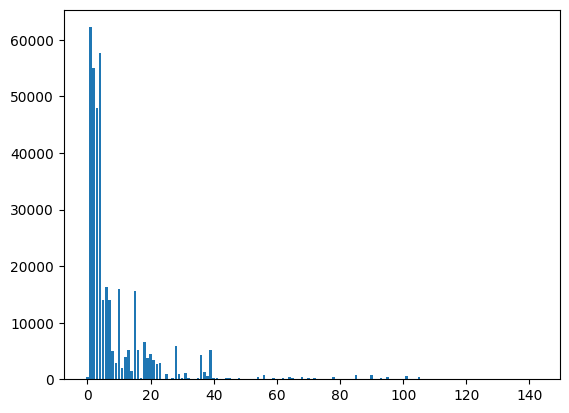

In [279]:
# С помощью пакета matplolib визуализируем данные в виде гистограммы
plt.bar(df['Продано'], df['Цена'])
plt.show()

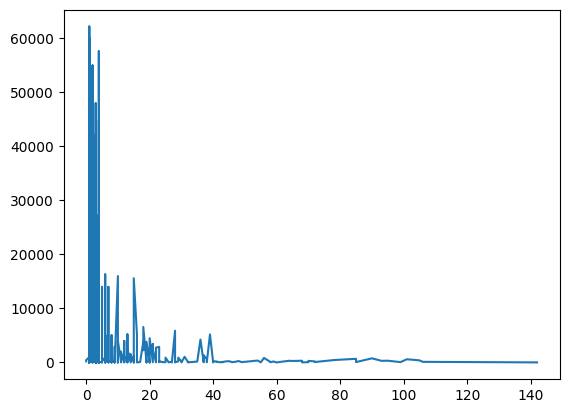

In [280]:
# С помощью пакета matplolib визуализируем данные в виде графика
plt.plot(df['Продано'], df['Цена'])
plt.show()

Гараздо интереснее было бы посмотреть на отчет например о выручке по дням. Или продажи по дням в разрезе номеклатуры